In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
os.getcwd()

'C:\\Users\\saura'

In [3]:
os.chdir('F:\\New folder\\Batch67 Day33\\Project 12 Flight Price Predict Heroku\\')

In [4]:
os.getcwd()

'F:\\New folder\\Batch67 Day33\\Project 12 Flight Price Predict Heroku'

In [5]:
df=pd.read_excel('Data_Train.xlsx')
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,11:25,5h 40m,1 stop,Business class,79512
1,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,12:25,6h 40m,1 stop,Business class,62427
2,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → MAA → DEL,09:45,14:25,4h 40m,1 stop,Business class,57209
3,Jet Airways,18/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:40,00:45 16 Mar,6h 5m,1 stop,No info,54826
4,Jet Airways,18/03/2019,Banglore,New Delhi,BLR → BOM → DEL,22:50,05:05 16 Mar,6h 15m,1 stop,No info,54826
...,...,...,...,...,...,...,...,...,...,...,...
10678,Jet Airways,27/03/2019,Mumbai,Hyderabad,BOM → HYD,02:55,04:25,1h 30m,non-stop,In-flight meal not included,1840
10679,SpiceJet,21/03/2019,Mumbai,Hyderabad,BOM → HYD,22:45,00:10 22 Mar,1h 25m,non-stop,No info,1759
10680,SpiceJet,27/03/2019,Mumbai,Hyderabad,BOM → HYD,22:45,00:10 28 Mar,1h 25m,non-stop,No info,1759
10681,SpiceJet,3/04/2019,Mumbai,Hyderabad,BOM → HYD,22:45,00:15 02 Apr,1h 30m,non-stop,No info,1759


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [8]:
len(df)

10683

In [9]:
display(df.isnull().sum())

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [10]:
df.dropna(how='any',inplace=True)
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [11]:
display(df.shape)

(10682, 11)

In [12]:
df.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,11:25,5h 40m,1 stop,Business class,79512
1,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,12:25,6h 40m,1 stop,Business class,62427
2,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → MAA → DEL,09:45,14:25,4h 40m,1 stop,Business class,57209
3,Jet Airways,18/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:40,00:45 16 Mar,6h 5m,1 stop,No info,54826
4,Jet Airways,18/03/2019,Banglore,New Delhi,BLR → BOM → DEL,22:50,05:05 16 Mar,6h 15m,1 stop,No info,54826
5,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,16:55,23:00,6h 5m,1 stop,No info,54826
6,Jet Airways Business,6/03/2019,Delhi,Cochin,DEL → ATQ → BOM → COK,20:05,04:25 07 Mar,8h 20m,2 stops,No info,52285
7,Jet Airways Business,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,05:45,10:45,5h,1 stop,No info,52229
8,Jet Airways Business,3/03/2019,Delhi,Cochin,DEL → ATQ → BOM → COK,20:05,04:25 04 Mar,8h 20m,2 stops,No info,46490
9,Multiple carriers,1/03/2019,Delhi,Cochin,DEL → BOM → COK,12:50,19:15,6h 25m,1 stop,No info,36983


In [13]:
df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])
df.dtypes

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '18/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '24/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15/03/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '24/05/2019' in DD/MM/YYYY format. Provide format or specif

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time                   object
Arrival_Time               object
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [14]:
df['Day_of_Journey']=df['Date_of_Journey'].dt.day
df['Month_of_Journey']=df['Date_of_Journey'].dt.month
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Day_of_Journey', 'Month_of_Journey'],
      dtype='object')

In [15]:
df.drop('Date_of_Journey',axis=1,inplace=True)
df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Day_of_Journey',
       'Month_of_Journey'],
      dtype='object')

In [16]:
df['Dep_hr']=pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_min']=pd.to_datetime(df['Dep_Time']).dt.minute
df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Day_of_Journey',
       'Month_of_Journey', 'Dep_hr', 'Dep_min'],
      dtype='object')

In [17]:
df.drop('Dep_Time',axis=1,inplace=True)
df

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min
0,Jet Airways Business,Banglore,New Delhi,BLR → BOM → DEL,11:25,5h 40m,1 stop,Business class,79512,3,1,5,45
1,Jet Airways Business,Banglore,New Delhi,BLR → BOM → DEL,12:25,6h 40m,1 stop,Business class,62427,3,1,5,45
2,Jet Airways Business,Banglore,New Delhi,BLR → MAA → DEL,14:25,4h 40m,1 stop,Business class,57209,3,1,9,45
3,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,00:45 16 Mar,6h 5m,1 stop,No info,54826,18,3,18,40
4,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,05:05 16 Mar,6h 15m,1 stop,No info,54826,18,3,22,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Jet Airways,Mumbai,Hyderabad,BOM → HYD,04:25,1h 30m,non-stop,In-flight meal not included,1840,27,3,2,55
10679,SpiceJet,Mumbai,Hyderabad,BOM → HYD,00:10 22 Mar,1h 25m,non-stop,No info,1759,21,3,22,45
10680,SpiceJet,Mumbai,Hyderabad,BOM → HYD,00:10 28 Mar,1h 25m,non-stop,No info,1759,27,3,22,45
10681,SpiceJet,Mumbai,Hyderabad,BOM → HYD,00:15 02 Apr,1h 30m,non-stop,No info,1759,4,3,22,45


In [18]:
df['Arrival_hr']=pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arrival_min']=pd.to_datetime(df['Arrival_Time']).dt.minute
df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Arrival_Time', 'Duration',
       'Total_Stops', 'Additional_Info', 'Price', 'Day_of_Journey',
       'Month_of_Journey', 'Dep_hr', 'Dep_min', 'Arrival_hr', 'Arrival_min'],
      dtype='object')

In [19]:
df.drop('Arrival_Time',axis=1,inplace=True)
df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Day_of_Journey', 'Month_of_Journey',
       'Dep_hr', 'Dep_min', 'Arrival_hr', 'Arrival_min'],
      dtype='object')

In [20]:
duration=df['Duration'].str.split(' ',expand=True)
duration

,0,1
0,5h,40m
1,6h,40m
2,4h,40m
3,6h,5m
4,6h,15m
...,...,...
10678,1h,30m
10679,1h,25m
10680,1h,25m
10681,1h,30m


In [21]:
duration[1]

0        40m
1        40m
2        40m
3         5m
4        15m
        ... 
10678    30m
10679    25m
10680    25m
10681    30m
10682    20m
Name: 1, Length: 10682, dtype: object

In [22]:
duration[1].fillna('00m',inplace=True)
display(duration)

,0,1
0,5h,40m
1,6h,40m
2,4h,40m
3,6h,5m
4,6h,15m
...,...,...
10678,1h,30m
10679,1h,25m
10680,1h,25m
10681,1h,30m


In [23]:
df['Duration_hr']=duration[0][0:].str[0:-1]
df['Duration_hr']

0        5
1        6
2        4
3        6
4        6
        ..
10678    1
10679    1
10680    1
10681    1
10682    1
Name: Duration_hr, Length: 10682, dtype: object

In [24]:
df['Duration_min']=duration[1][:].str[0:-1]
df['Duration_min']

0        40
1        40
2        40
3         5
4        15
         ..
10678    30
10679    25
10680    25
10681    30
10682    20
Name: Duration_min, Length: 10682, dtype: object

In [25]:
df.drop('Duration',axis=1,inplace=True)
df

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Dep_hr,Dep_min,Arrival_hr,Arrival_min,Duration_hr,Duration_min
0,Jet Airways Business,Banglore,New Delhi,BLR → BOM → DEL,1 stop,Business class,79512,3,1,5,45,11,25,5,40
1,Jet Airways Business,Banglore,New Delhi,BLR → BOM → DEL,1 stop,Business class,62427,3,1,5,45,12,25,6,40
2,Jet Airways Business,Banglore,New Delhi,BLR → MAA → DEL,1 stop,Business class,57209,3,1,9,45,14,25,4,40
3,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1 stop,No info,54826,18,3,18,40,0,45,6,5
4,Jet Airways,Banglore,New Delhi,BLR → BOM → DEL,1 stop,No info,54826,18,3,22,50,5,5,6,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Jet Airways,Mumbai,Hyderabad,BOM → HYD,non-stop,In-flight meal not included,1840,27,3,2,55,4,25,1,30
10679,SpiceJet,Mumbai,Hyderabad,BOM → HYD,non-stop,No info,1759,21,3,22,45,0,10,1,25
10680,SpiceJet,Mumbai,Hyderabad,BOM → HYD,non-stop,No info,1759,27,3,22,45,0,10,1,25
10681,SpiceJet,Mumbai,Hyderabad,BOM → HYD,non-stop,No info,1759,4,3,22,45,0,15,1,30


In [26]:
import matplotlib.pyplot as plt
import cufflinks as cf
import seaborn as sns
%matplotlib inline

In [27]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [28]:
Airprice=df.groupby('Airline')['Price'].mean().sort_values(ascending=False)
Airprice

Airline
Jet Airways Business                 58358.666667
Jet Airways                          11643.923357
Multiple carriers Premium economy    11418.846154
Multiple carriers                    10902.678094
Air India                             9612.427756
Vistara Premium economy               8962.333333
Vistara                               7796.348643
GoAir                                 5861.056701
IndiGo                                5673.682903
Air Asia                              5590.260188
SpiceJet                              4338.284841
Trujet                                4140.000000
Name: Price, dtype: float64

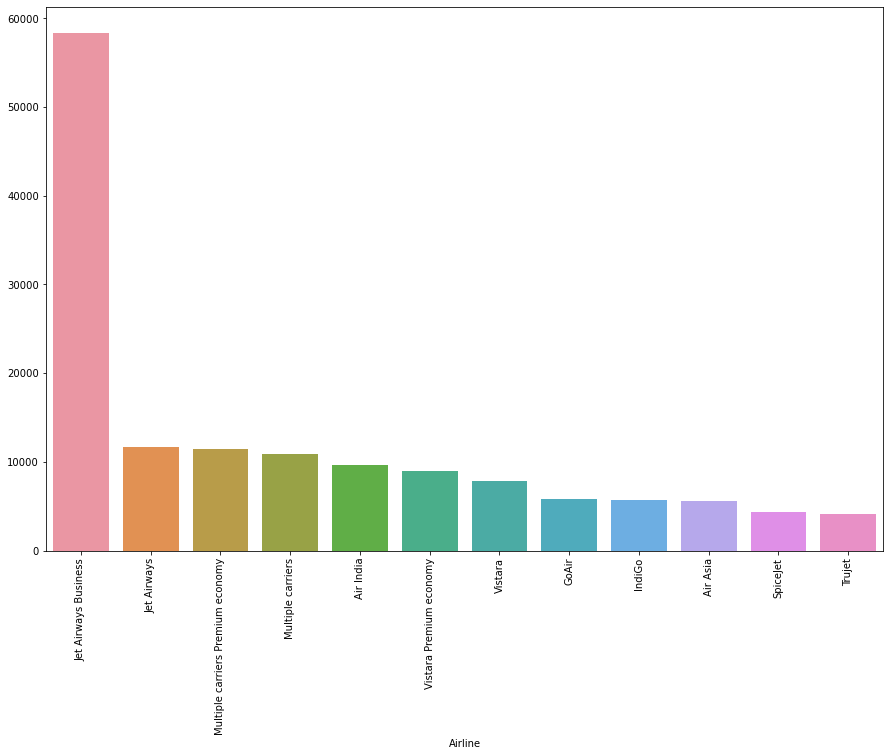

In [29]:
Airprice=df.groupby('Airline')['Price'].mean().sort_values(ascending=False)
plt.figure(figsize=(15,10))
sns.barplot(x=Airprice.index,y=Airprice.values)
plt.xticks(rotation=90)
plt.show()


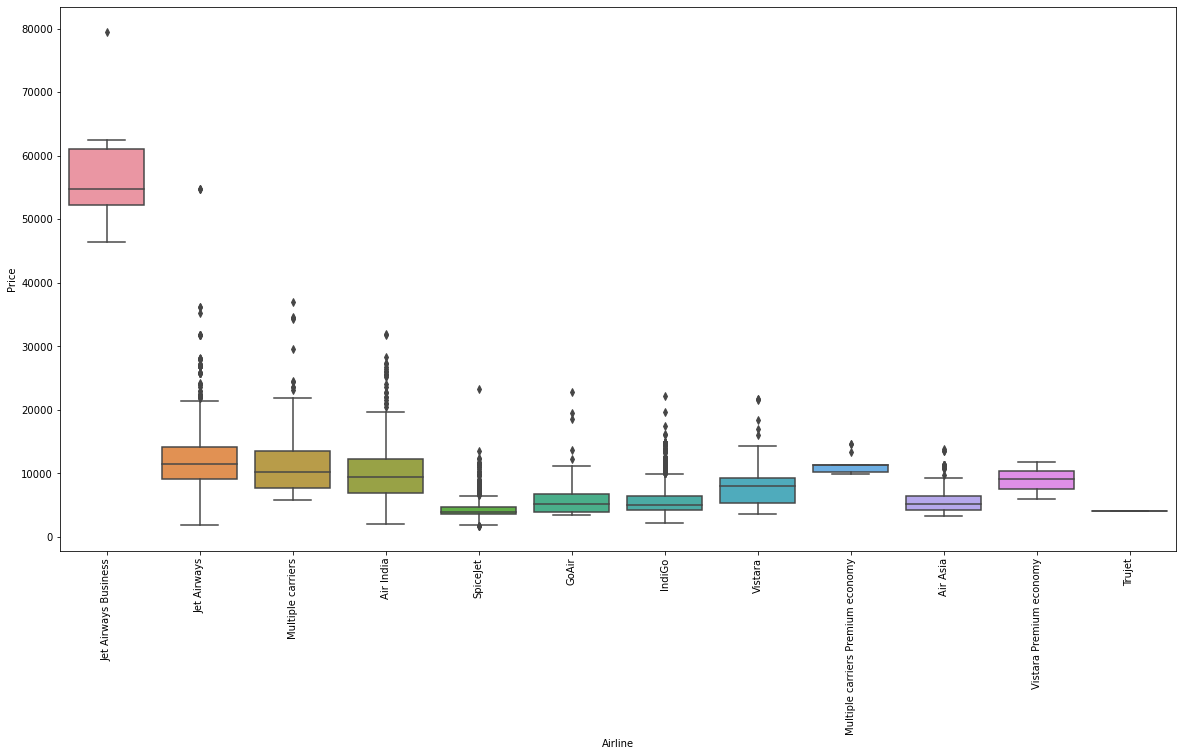

In [30]:
plt.figure(figsize=(20,10))
sns.boxplot(y='Price',x='Airline',data=df.sort_values('Price',ascending=False))
plt.xticks(rotation=90)
plt.show()

In [31]:
df.groupby(['Airline','Total_Stops'])['Price'].mean()

Airline                            Total_Stops
Air Asia                           1 stop          7078.325581
                                   2 stops         6341.888889
                                   non-stop        4492.331492
Air India                          1 stop          9041.509259
                                   2 stops        12092.779101
                                   3 stops        12208.054054
                                   4 stops        17686.000000
                                   non-stop        5605.326139
GoAir                              1 stop          6884.676471
                                   non-stop        4726.173913
IndiGo                             1 stop          7104.717528
                                   2 stops         7507.526316
                                   non-stop        4731.174053
Jet Airways                        1 stop         12512.741223
                                   2 stops        13387.247467
        

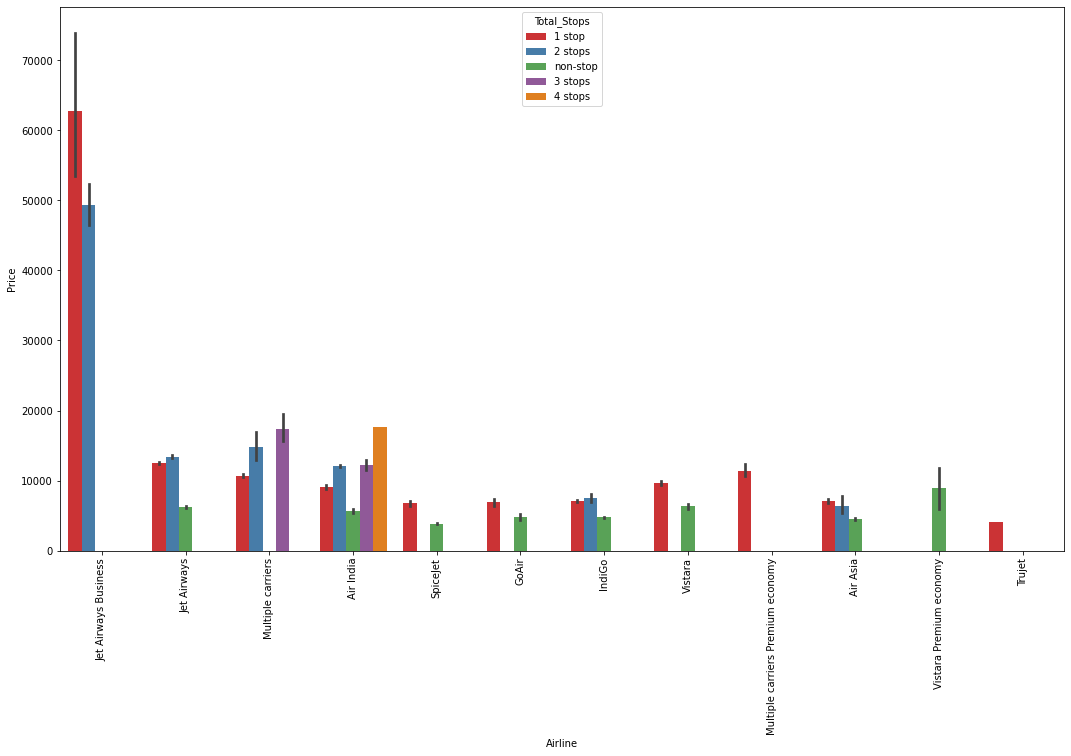

In [35]:
plt.figure(figsize=(18,10))
ax=sns.barplot(x=df['Airline'],y=df['Price'],hue=df['Total_Stops'],palette="Set1")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

In [33]:
df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

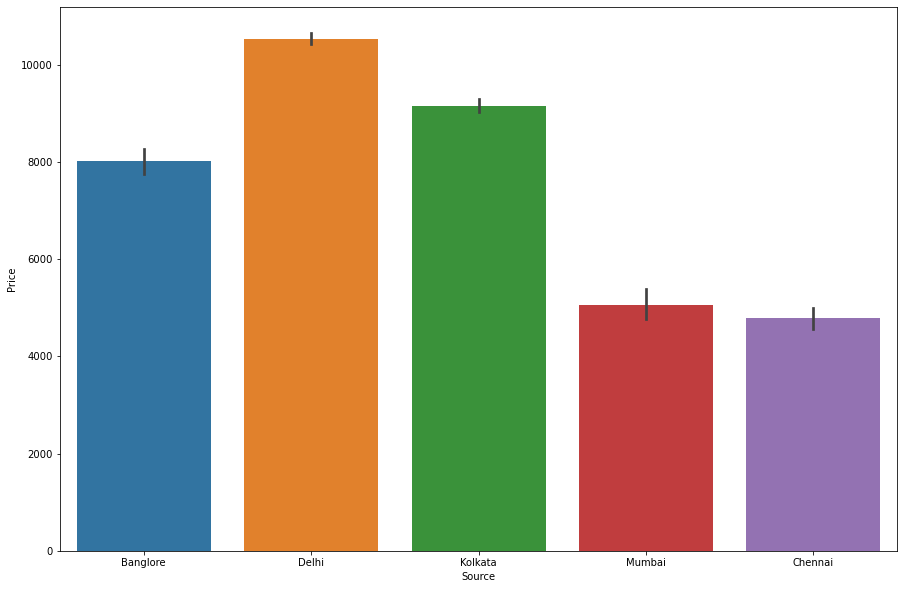

In [41]:
plt.figure(figsize=(15,10))
sns.barplot(y='Price',x='Source',data=df.sort_values('Price',ascending=False))
plt.show()

In [45]:
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [51]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Total_Stops',
       'Additional_Info', 'Price', 'Day_of_Journey', 'Month_of_Journey',
       'Dep_hr', 'Dep_min', 'Arrival_hr', 'Arrival_min', 'Duration_hr',
       'Duration_min'],
      dtype='object')

In [54]:
for k in df.columns:
    if k=='Destination':
        df['Destination'].replace('New Delhi','Delhi',inplace=True)
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        2197
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

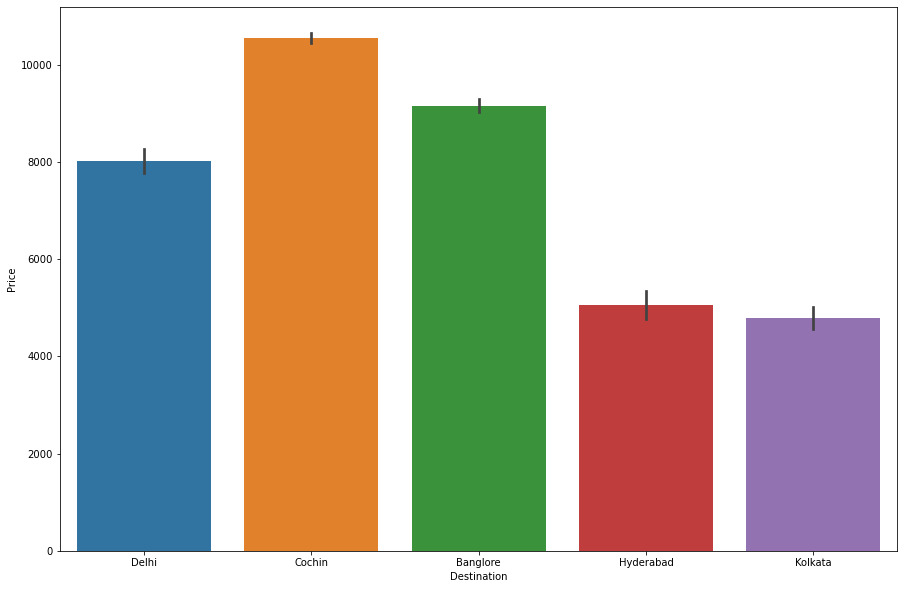

In [55]:
plt.figure(figsize=(15,10))
sns.barplot(y='Price',x='Destination',data=df.sort_values('Price',ascending=False))
plt.show()

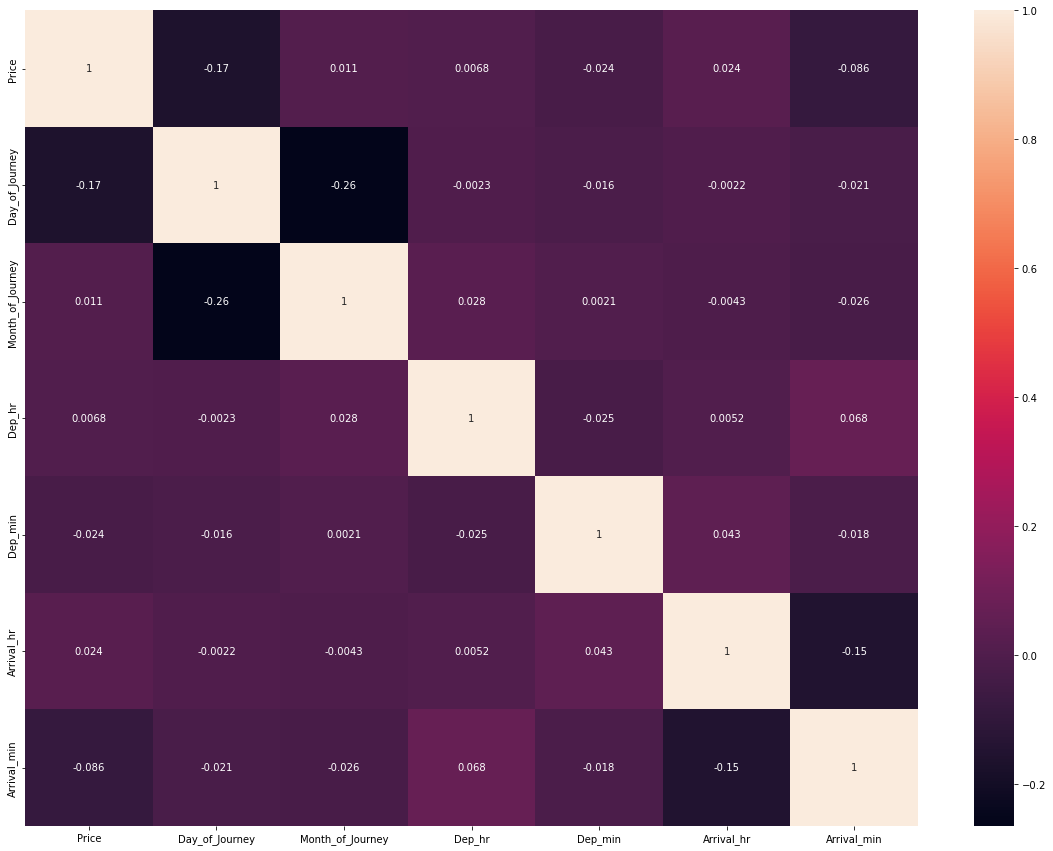

In [56]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)
plt.show()